<a href="https://colab.research.google.com/github/orlandojsjunior/Data_Science/blob/main/Analise_exploratoria/Notebooks/02_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [1]:
import pandas as pd

URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Dados-e-visualizacoes/Dados/ratings.csv"

notas = pd.read_csv(URL)
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape


(100836, 4)

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [7]:
notas.nota.head()


0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

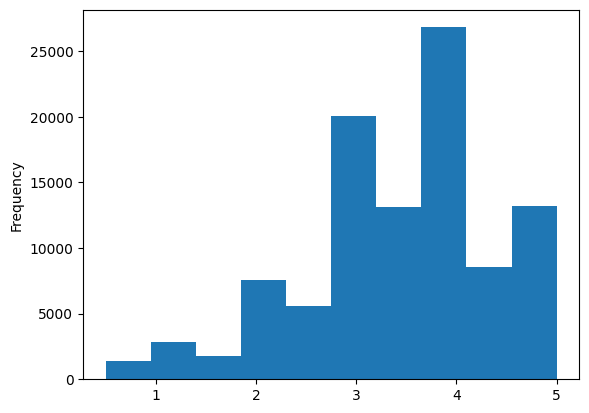

In [8]:
notas.nota.plot(kind='hist')

Descreve outras medidas de descrição dos dados

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

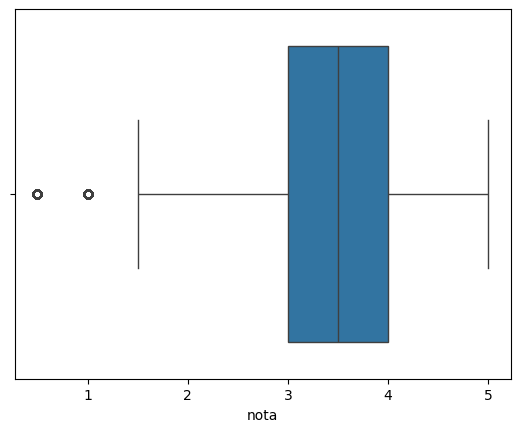

In [10]:
import seaborn as sns

sns.boxplot(x=notas.nota)

# 02 - Analise Exploratoria

In [11]:
URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Analise_exploratoria/Dados/movies.csv"

filmes = pd.read_csv(URL)

filmes.columns = ["filmesId", "titulo", "genero"]

filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



# Analisando algumas notas especificas por filme


Fazendo perguntas aos dados

In [13]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [15]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [16]:
notas.query("filmeId==2")

,usuarioId,filmeId,nota,momento
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [17]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [18]:
notas.groupby('filmeId')

In [19]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

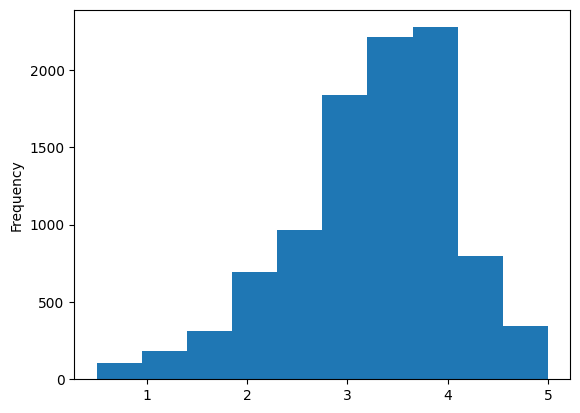

In [20]:
medias_por_filme.plot(kind="hist")


<Axes: xlabel='nota'>

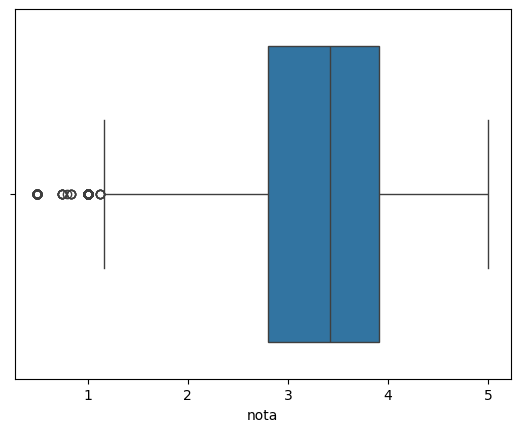

In [21]:
sns.boxplot(x=medias_por_filme)

In [22]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

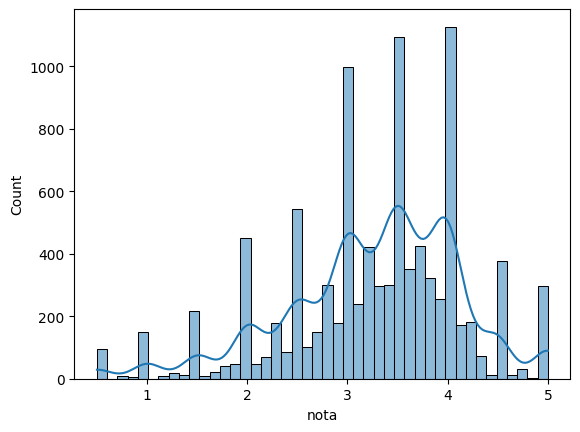

In [23]:
sns.histplot(medias_por_filme, kde=True)


# Updating code that uses seaborn.distplot

Mas esse histograma parece diferente daquele do Pandas, não? Isso acontece pois o histograma é gerado com base em um número de separações (as barras). No caso do Pandas, tínhamos 10 separações; e no Seaborn, bem mais que isso. Com o argumento bins, podemos definir esse número. Se atribuirmos 10, por exemplo, teremos um histograma praticamente idêntico ao do Pandas:

<Axes: xlabel='nota', ylabel='Count'>

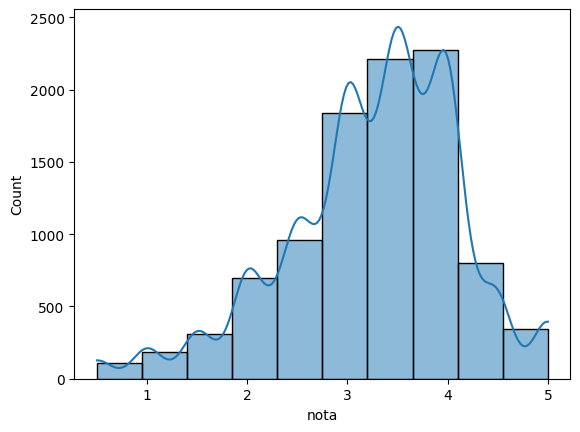

In [24]:
sns.histplot(medias_por_filme, kde=True, bins=10)


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

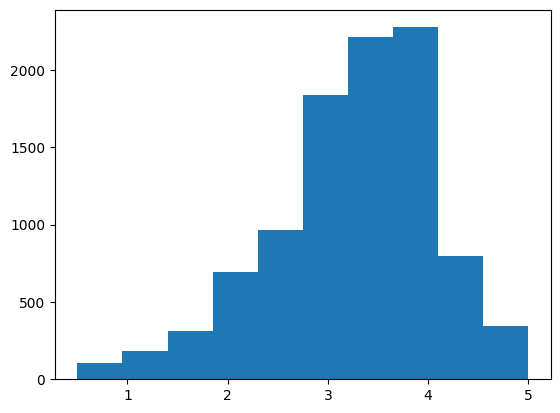

In [25]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)


Assim como nas outras bibliotecas, podemos consultar a documentação do Matplotlib para descobrirmos outras operações e funcionalidades. Um exemplo é mostrarmos o título do gráfico, com plt.title():

Text(0.5, 1.0, 'Histograma das médias dos filmes')

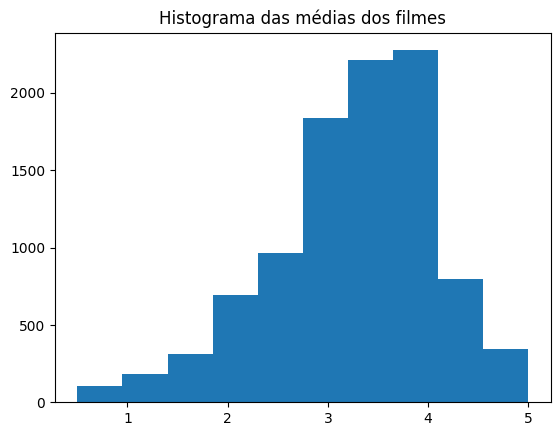

In [26]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")


Esse tipo de configuração também pode ser feita no Seaborn: na prática, o boxplot costuma ser feito na vertical (eixo y), e não na horizontal (eixo x).

<Axes: ylabel='nota'>

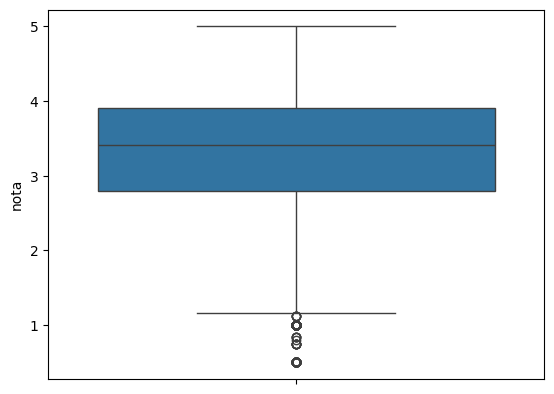

In [27]:
sns.boxplot(y=medias_por_filme)


Outra configuração possível é em relação ao tamanho da imagem. Com a função figure() e o argumento figsize, podemos definir uma proporção para nosso boxplot, como 5x8:

<Axes: ylabel='nota'>

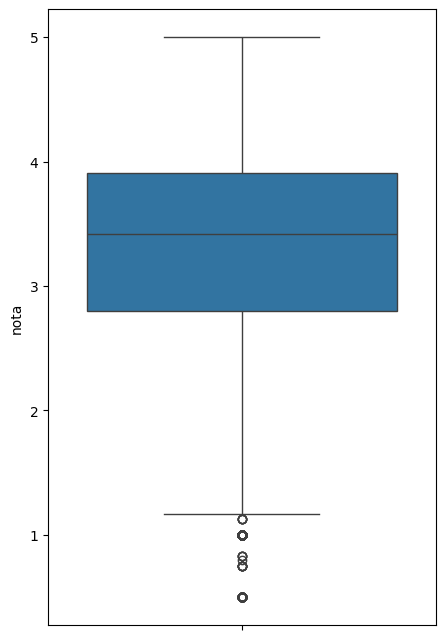

In [28]:
plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)


# Faça como eu fiz na aula

<Axes: ylabel='Frequency'>

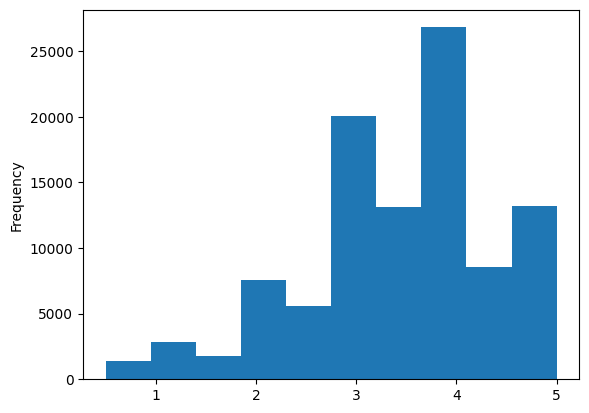

In [34]:
notas.nota.plot(kind='hist')


In [35]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

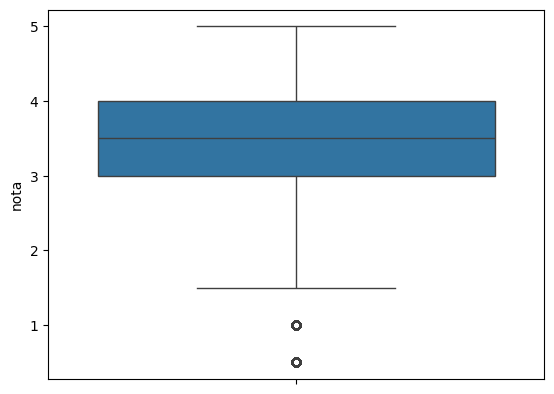

In [30]:
import seaborn as sns

sns.boxplot(notas.nota)



In [36]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [37]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [32]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64